In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

## Read in Our Data

The first step is to read out data into a `pandas` DataFrame.  For an intro to using `pandas` I would highly suggest looking though [this 10 minute guide to `pandas`](http://pandas.pydata.org/pandas-docs/stable/10min.html).

In [2]:
df = pd.read_csv('npr_articles.csv')

We can now checkout what our data consists of by using the `.head()` method on our DataFrame.  By default, this will show the top 5 rows.

In [3]:
df.head()

,article_text,author,date_published,headline,section,url,processed_text
0,Birdsong is music to human ears. It has inspir...,['Barbara J. King'],2016-12-01 09:30:00,What Do Birds Hear When They Sing Beautiful So...,13.7: Cosmos And Culture,http://www.npr.org/sections/13.7/2016/12/01/50...,birdsong music human ear inspire famous compos...
1,Two months after Colombian voters narrowly rej...,['Mark Katkov'],2016-12-01 11:57:00,Colombia's Congress Ratifies Second Peace Deal...,The Two-Way,http://www.npr.org/sections/thetwo-way/2016/12...,two_months colombian voter narrowly reject pea...
2,On a hillside overlooking the steppes of north...,['Rob Schmitz'],2016-12-01 12:50:00,"Amid Economic Crisis, Mongolians Risk Their Li...",Parallels,http://www.npr.org/sections/parallels/2016/12/...,hillside overlook steppe northeastern mongolia...
3,"When I last visited Damascus in 2008, the hist...",['Peter Kenyon'],2016-12-01 12:50:00,"Returning To Damascus, A City Changed By War",Parallels,http://www.npr.org/sections/parallels/2016/12/...,visit damascus historic old_city district west...
4,"Boston's official 2016 Christmas tree, like ot...",['Edgar B. Herwick III'],2016-12-01 13:16:00,Boston's Christmas Tree Tradition Rooted In A ...,Around the Nation,http://www.npr.org/2016/12/01/503907535/boston...,boston official christmas tree come thank gift...


One of the first steps you should take is to get an overview of what kind of data we have but running the `.info()` method.  Please [see the documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html) for more info (no pun intended).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2275 entries, 0 to 2274
Data columns (total 7 columns):
article_text      2275 non-null object
author            1708 non-null object
date_published    2275 non-null object
headline          2275 non-null object
section           2267 non-null object
url               2275 non-null object
processed_text    2275 non-null object
dtypes: object(7)
memory usage: 124.5+ KB


We can see that the column `date_published` is being interpreted as an `object` and not a datetime.  Let's change that by using the [`pandas.to_datetime()` function](http://pandas.pydata.org/pandas-docs/version/0.19.2/generated/pandas.to_datetime.html).

In [5]:
df['date_published'] = pd.to_datetime(df['date_published'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2275 entries, 0 to 2274
Data columns (total 7 columns):
article_text      2275 non-null object
author            1708 non-null object
date_published    2275 non-null datetime64[ns]
headline          2275 non-null object
section           2267 non-null object
url               2275 non-null object
processed_text    2275 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 124.5+ KB


## Number of Authors 

Let's say we wanted to add in another column that contains the number of authors that worked on a particular article.  We could do this like so:

In [7]:
# Let's create a mask for all rows that have a non-null value
mask = df['author'].notnull()

# When the data was saved to a csv, these lists were converted into strings, we can convert
# them back like so
from ast import literal_eval
df.loc[mask, 'author'] = df.loc[mask, 'author'].map(literal_eval)

# Initialize column with NaN's and then fill in the respective values
df['num_authors'] = np.nan
df.loc[mask, 'num_authors'] = df.loc[mask, 'author'].map(len)

We can now take a look at the summary statistics of any numeric columns by running the `.describe()` method. 

In [8]:
df.describe()

/home/ubuntu/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,num_authors
count,1708.000000
mean,1.055035
std,0.285180
min,1.000000
25%,NaN
50%,NaN
75%,NaN
max,6.000000


In [9]:
df.head()

,article_text,author,date_published,headline,section,url,processed_text,num_authors
0,Birdsong is music to human ears. It has inspir...,[Barbara J. King],2016-12-01 09:30:00,What Do Birds Hear When They Sing Beautiful So...,13.7: Cosmos And Culture,http://www.npr.org/sections/13.7/2016/12/01/50...,birdsong music human ear inspire famous compos...,1.0
1,Two months after Colombian voters narrowly rej...,[Mark Katkov],2016-12-01 11:57:00,Colombia's Congress Ratifies Second Peace Deal...,The Two-Way,http://www.npr.org/sections/thetwo-way/2016/12...,two_months colombian voter narrowly reject pea...,1.0
2,On a hillside overlooking the steppes of north...,[Rob Schmitz],2016-12-01 12:50:00,"Amid Economic Crisis, Mongolians Risk Their Li...",Parallels,http://www.npr.org/sections/parallels/2016/12/...,hillside overlook steppe northeastern mongolia...,1.0
3,"When I last visited Damascus in 2008, the hist...",[Peter Kenyon],2016-12-01 12:50:00,"Returning To Damascus, A City Changed By War",Parallels,http://www.npr.org/sections/parallels/2016/12/...,visit damascus historic old_city district west...,1.0
4,"Boston's official 2016 Christmas tree, like ot...",[Edgar B. Herwick III],2016-12-01 13:16:00,Boston's Christmas Tree Tradition Rooted In A ...,Around the Nation,http://www.npr.org/2016/12/01/503907535/boston...,boston official christmas tree come thank gift...,1.0


## Number of Unique Authors

Let's say we wanted to get the number of unique authors that are represented in this dataframe.  We could potentially use `df['author'].nunique()` but we are going to run into an error because each row contains a `list` which isn't hashable.

Instead we could loop through each value and extend a set like so:

In [10]:
# Create a set to hold our authors
authors = set()
for lst in df.loc[mask, 'author']:
    # For every row, update the authors set with those contained in that row
    authors.update(lst)
# Print out the total authors seen
print(len(authors))

451


If we also wanted the number of times a particular author was involved in writing an article we could leverage the power of `Counter`'s from the `collections` library.  Refer to the [documentation](https://docs.python.org/2/library/collections.html) for more information.

In [11]:
from collections import Counter
authors = df.loc[mask, 'author'].map(Counter).sum()

In [12]:
authors

Counter({'Aarti Shahani': 3,
         'Adam Cole': 2,
         'Adam Frank': 5,
         'Adrian Florido': 3,
         'Agerenesh Ashagre': 1,
         'Ailsa Chang': 3,
         'Aki Peritz': 2,
         'Alan Greenblatt': 1,
         'Alan Yu': 5,
         'Alejandra Maria Salazar': 1,
         'Alex Ariff': 1,
         'Alex Cohen': 1,
         'Alex Zaragoza': 1,
         'Alexandra Olgin': 1,
         'Alexandria Lee': 4,
         'Alexi Horowitz-Ghazi': 1,
         'Alice Fordham': 4,
         'Alina Selyukh': 8,
         'Alison Fensterstock': 2,
         'Alison Kodjak': 9,
         'Alison Meuse': 2,
         'Alison Richards': 1,
         'Allison Aubrey': 5,
         'Alva Noë': 5,
         'Alyssa Edes': 1,
         'Amal El-Mohtar': 2,
         'Ammad Omar': 5,
         'Amy E. Robertson': 1,
         'Amy Sisk': 1,
         'An-Li Herring': 2,
         'Anastasia Tsioulcas': 2,
         'Andrew Lapin': 6,
         'Andrew Limbong': 2,
         'Angus Chen': 4,
         'A

In [13]:
authors.most_common()

[('NPR Staff', 105),
 ('Camila Domonoske', 88),
 ('Merrit Kennedy', 61),
 ('Rebecca Hersher', 60),
 ('Colin Dwyer', 41),
 ('Bill Chappell', 37),
 ('Glen Weldon', 29),
 ('Maggie Penman', 28),
 ('Jessica Taylor', 26),
 ('David Dye', 23),
 ('Bob Boilen', 22),
 ('Brian Naylor', 20),
 ('Lars Gotrich', 20),
 ('Korva Coleman', 18),
 ('Robin Hilton', 18),
 ('Danielle Kurtzleben ', 15),
 ('Laura Wagner', 15),
 ('Jason Slotkin', 15),
 ('Scott Horsley', 13),
 ('Linda Holmes', 13),
 ('Stephen Thompson', 12),
 ('Talia Schlanger', 12),
 ('Scott Detrow', 12),
 ('Felix Contreras', 11),
 ('Cam Robert', 11),
 ('Tamara Keith', 11),
 ('Jim Zarroli', 11),
 ('Nell Greenfieldboyce', 10),
 ('Brakkton Booker', 10),
 ('Dan Charles', 9),
 ('Alison Kodjak', 9),
 ('Susan Davis', 9),
 ('Domenico Montanaro', 9),
 ('NPR/TED Staff', 9),
 ('Rob Schmitz', 9),
 ('Jason Bentley', 8),
 ('Mark Katkov', 8),
 ('Alina Selyukh', 8),
 ('Rae Ellen Bichell', 8),
 ('Richard Gonzales', 8),
 ('Wynne Davis', 8),
 ('Doreen McCallister'

In [14]:
authors['Ari Shapiro']

3

Let's say we wanted to now subset down to the articles which Ari Shapiro worked on.  There are a variety of way's we could do this but I will demo one possible avenue.

In [15]:
# Because some rows have NaN's in them, we need to get clever with how we
# create our mask
mask = df['author'].map(lambda x: 'Ari Shapiro' in x if isinstance(x, list)
                                   else False)

df.loc[mask, 'headline']

1268    Encore: Solange's 'A Seat At The Table' Honors...
1692    In Toledo, Syrian Refugees Are Welcomed Amid A...
1873    As A Syrian Refugee In Toledo Pines For His Fa...
Name: headline, dtype: object

In [16]:
# Here is another way we could acheive this
mask = df.loc[df['author'].notnull(), 'author'].map(lambda x: 'Ari Shapiro' in x)

df.loc[df['author'].notnull()].loc[mask, 'headline']

1268    Encore: Solange's 'A Seat At The Table' Honors...
1692    In Toledo, Syrian Refugees Are Welcomed Amid A...
1873    As A Syrian Refugee In Toledo Pines For His Fa...
Name: headline, dtype: object

## Most popular sections

Let's find what the 5 most popular sections (as judged by the number of articles published within that article)

In [17]:
df['section'].value_counts(dropna=False)[:5]

The Two-Way            479
Here And Now           398
Politics               181
Shots - Health News    103
Parallels               88
Name: section, dtype: int64

When we first were looking at our DataFrame, you may have noticed that there are quite a few rows missing author information.  Maybe we have a hypothesis that there are certain sections that systemically weren't attaching author information.  Let's dive deeper to try and prove/disprove this hypothesis...

In [18]:
# Let's create a new column that indicates whether the author attribute was null or not
# This helps with the groupby below
df['author_null'] = df['author'].isnull()

# Get the mean amount of nulls for each section and sort descending
# NOTE: 1.0 indicates ALL Nulls
df.groupby('section')['author_null'].mean().sort_values(ascending=False)

section
Europe                                            1.000000
The Thistle & Shamrock                            1.000000
From Scratch                                      1.000000
Games & Humor                                     1.000000
Dear Sugars                                       1.000000
Here And Now                                      1.000000
Joe's Big Idea                                    1.000000
Marian McPartland's Piano Jazz                    1.000000
Metropolis                                        1.000000
Ask Me Another                                    1.000000
Mountain Stage                                    1.000000
Analysis                                          1.000000
Movies                                            1.000000
Wait Wait...Don't Tell Me!                        1.000000
On Point                                          1.000000
Fresh Air Weekend                                 1.000000
Planet Money                                    

As we can see, there are clearly sections that are consistently not attaching author information as well as many that are hit or miss with the author information.

## Article Count by Time

Let's make a plot showing the frequency of articles published by day, week, and month.

In [19]:
# Create a pandas Series with 1's as the values and the date as the index
s = pd.Series([1], index=df['date_published'])

In [20]:
s[:10]

date_published
2016-12-01 09:30:00    1
2016-12-01 11:57:00    1
2016-12-01 12:50:00    1
2016-12-01 12:50:00    1
2016-12-01 13:16:00    1
2016-12-01 13:48:00    1
2016-12-01 14:00:00    1
2016-12-01 14:14:00    1
2016-12-01 15:00:00    1
2016-12-01 15:29:00    1
dtype: int64

Below we see how we could use the [resample function](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) to find the number of articles published per day.  

NOTE: Our DataFrame/Series must have a datetimeindex for this to work!

In [21]:
# Let's resample that Series and sum the values to find the number of articles by Day
s.resample('D').sum()

date_published
2016-12-01    43
2016-12-02    63
2016-12-03    11
2016-12-04    13
2016-12-05    52
2016-12-06    53
2016-12-07    62
2016-12-08    65
2016-12-09    83
2016-12-10    20
2016-12-11    17
2016-12-12    59
2016-12-13    57
2016-12-14    76
2016-12-15    68
2016-12-16    92
2016-12-17    33
2016-12-18    17
2016-12-19    49
2016-12-20    75
2016-12-21    62
2016-12-22    61
2016-12-23    74
2016-12-24    22
2016-12-25    19
2016-12-26    25
2016-12-27    43
2016-12-28    55
2016-12-29    49
2016-12-30    61
2016-12-31    25
2017-01-01    13
2017-01-02    27
2017-01-03    88
2017-01-04    59
2017-01-05    81
2017-01-06    60
2017-01-07    19
2017-01-08    15
2017-01-09    61
2017-01-10    58
2017-01-11    71
2017-01-12    82
2017-01-13    78
2017-01-14    30
2017-01-15    22
2017-01-16     7
Freq: D, dtype: int64

There are, of course, many different offset alias' for passing to `resample`.  For more options [see this page](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases).

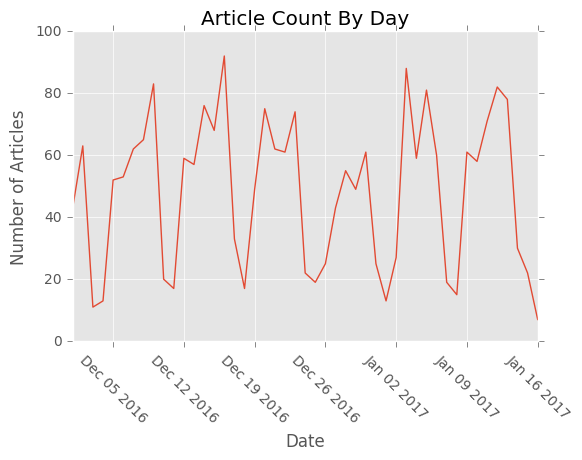

In [22]:
plt.plot(s.resample('D').sum())
plt.title('Article Count By Day')
plt.ylabel('Number of Articles')
plt.xlabel('Date')
locs, labels = plt.xticks()
plt.setp(labels, rotation=-45);

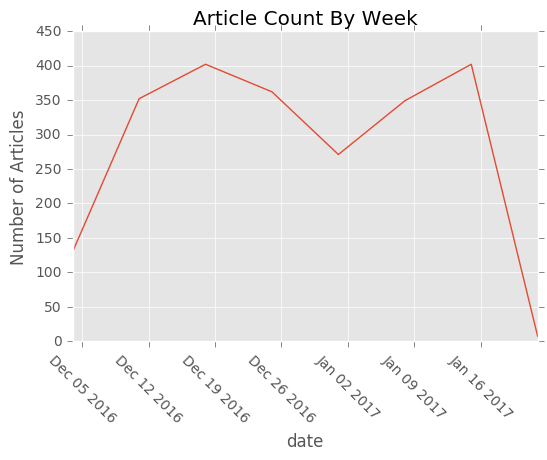

In [23]:
plt.plot(s.resample('W').sum())
plt.title('Article Count By Week')
plt.ylabel('Number of Articles')
plt.xlabel('date')
locs, labels = plt.xticks()
plt.setp(labels, rotation=-45);

## What hour is the most popular time for publishing articles?

To answer this let's extract the hour when the article was published and create a histogram.

In [24]:
df['hour_published'] = df['date_published'].dt.hour

We were able to run the above command because that particular column contains a datetime object.  From there we can run `.dt` and then extract any aspect of that datetime (e.g. `.dt.hour`, `.dt.second`, `.dt.month`, `.dt.quarter`)

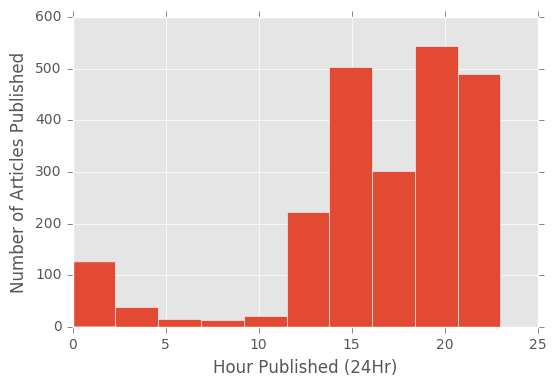

In [25]:
df['hour_published'].hist()
plt.ylabel('Number of Articles Published')
plt.xlabel('Hour Published (24Hr)');

By default, the `.hist` method is going to plot 10 bins.  Let's up that to 24 bins so we have a bin for each hour in the day...

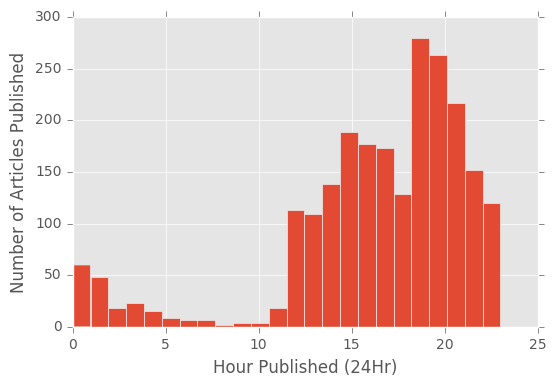

In [26]:
# Let's force the plot to split into 24 bins, one for each hour
df['hour_published'].hist(bins=24)
plt.ylabel('Number of Articles Published')
plt.xlabel('Hour Published (24Hr)');

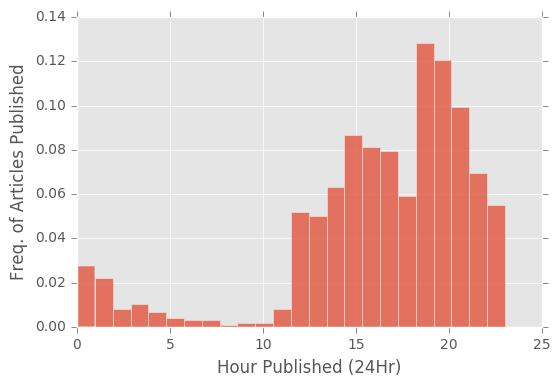

In [27]:
# Let's extract the relative frequency rather than the raw counts
df['hour_published'].hist(bins=24, normed=True, alpha=0.75)
plt.ylabel('Freq. of Articles Published')
plt.xlabel('Hour Published (24Hr)');

In [28]:
# We can also grab this information without plotting it using .value_counts
df['hour_published'].value_counts()

19    280
20    263
21    217
15    189
16    177
17    173
22    152
14    138
18    129
23    120
12    113
13    109
0      60
1      48
3      23
11     18
2      18
4      15
5       9
7       7
6       7
9       4
10      4
8       2
Name: hour_published, dtype: int64

In [29]:
df['hour_published'].value_counts(normalize=True)

19    0.123077
20    0.115604
21    0.095385
15    0.083077
16    0.077802
17    0.076044
22    0.066813
14    0.060659
18    0.056703
23    0.052747
12    0.049670
13    0.047912
0     0.026374
1     0.021099
3     0.010110
11    0.007912
2     0.007912
4     0.006593
5     0.003956
7     0.003077
6     0.003077
9     0.001758
10    0.001758
8     0.000879
Name: hour_published, dtype: float64

In [30]:
# Or we could leave them in the order of a day
df['hour_published'].value_counts().sort_index()

0      60
1      48
2      18
3      23
4      15
5       9
6       7
7       7
8       2
9       4
10      4
11     18
12    113
13    109
14    138
15    189
16    177
17    173
18    129
19    280
20    263
21    217
22    152
23    120
Name: hour_published, dtype: int64

## Selecting Particular Dates

Let's select articles which were published between 10 am and 2 pm on December 24th, 2016.  There are a couple of ways we could do this, but let's start by making a mask.

In [31]:
mask = ((df['date_published'] >= '2016-12-24 10:00:00') &
        (df['date_published'] <= '2016-12-24 14:00:00'))

In [32]:
df.loc[mask, :]

,article_text,author,date_published,headline,section,url,processed_text,num_authors,author_null,hour_published
1211,"Graeme Wood may be known as a journalist, but ...",[Dennis Ross],2016-12-24 12:00:00,'The Way Of The Strangers' Explores The Pull O...,NaN,http://www.npr.org/2016/12/24/506763820/the-wa...,graeme_wood know journalist fool student islam...,1.0,False,12
1212,"""São Paulo is the graveyard of samba."" So clai...",[Marina Lopes],2016-12-24 12:00:00,"In Gritty Sao Paulo, Samba Reinvents Itself Wi...",Parallels,http://www.npr.org/sections/parallels/2016/12/...,são paulo graveyard samba claim late brazilian...,1.0,False,12
1213,Subscription box services generally are boomin...,[Wynne Davis],2016-12-24 12:00:00,You've Got Mail: Book Boxes Offer Novels And N...,NPR Ed,http://www.npr.org/sections/ed/2016/12/24/4958...,subscription box service generally boom fee co...,1.0,False,12
1214,Editor's note: This story was originally publi...,[Bonny Wolf],2016-12-24 12:40:00,Beyond Latkes: 8 Nights Of Fried Delights From...,The Salt,http://www.npr.org/sections/thesalt/2016/12/24...,editor note story originally publish oil the_e...,1.0,False,12
1215,The Affordable Care Act is on the chopping blo...,[Scott Horsley],2016-12-24 13:53:00,"White House Sharpens Its Case For Obamacare, A...",Politics,http://www.npr.org/2016/12/24/506338057/white-...,the_affordable_care_act chopping block likely ...,1.0,False,13


In [33]:
# Or we could reset or index and do it that way...
df2 = df.set_index('date_published')
df2.loc['2016-12-24 10:00:00': '2016-12-24 14:00:00', :]

,article_text,author,headline,section,url,processed_text,num_authors,author_null,hour_published
date_published,,,,,,,,,
2016-12-24 12:00:00,"Graeme Wood may be known as a journalist, but ...",[Dennis Ross],'The Way Of The Strangers' Explores The Pull O...,NaN,http://www.npr.org/2016/12/24/506763820/the-wa...,graeme_wood know journalist fool student islam...,1.0,False,12
2016-12-24 12:00:00,"""São Paulo is the graveyard of samba."" So clai...",[Marina Lopes],"In Gritty Sao Paulo, Samba Reinvents Itself Wi...",Parallels,http://www.npr.org/sections/parallels/2016/12/...,são paulo graveyard samba claim late brazilian...,1.0,False,12
2016-12-24 12:00:00,Subscription box services generally are boomin...,[Wynne Davis],You've Got Mail: Book Boxes Offer Novels And N...,NPR Ed,http://www.npr.org/sections/ed/2016/12/24/4958...,subscription box service generally boom fee co...,1.0,False,12
2016-12-24 12:40:00,Editor's note: This story was originally publi...,[Bonny Wolf],Beyond Latkes: 8 Nights Of Fried Delights From...,The Salt,http://www.npr.org/sections/thesalt/2016/12/24...,editor note story originally publish oil the_e...,1.0,False,12
2016-12-24 13:53:00,The Affordable Care Act is on the chopping blo...,[Scott Horsley],"White House Sharpens Its Case For Obamacare, A...",Politics,http://www.npr.org/2016/12/24/506338057/white-...,the_affordable_care_act chopping block likely ...,1.0,False,13


## Length of Articles (# Words)

Maybe we are interested in looking at the distribution of how long our articles are...

In [34]:
df['num_words'] = df['article_text'].map(lambda x: len(x.split()))

In [35]:
df['num_words'].describe()

count    2275.000000
mean      541.320440
std       502.855345
min         8.000000
25%       160.000000
50%       463.000000
75%       753.000000
max      8227.000000
Name: num_words, dtype: float64

Let's create a histogram of the length of different articles...

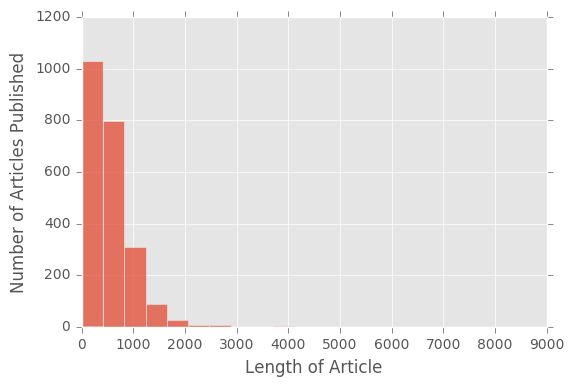

In [36]:
df['num_words'].hist(bins=20, alpha=0.75)
plt.ylabel('Number of Articles Published')
plt.xlabel('Length of Article');

Clearly there are some outliers in this data.  Let's subset what we are plotting to cut out the top 2% of articles in terms of article length and see what the resulting histogram looks like...

Refer to [the `numpy` percentile function](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html) for more information.

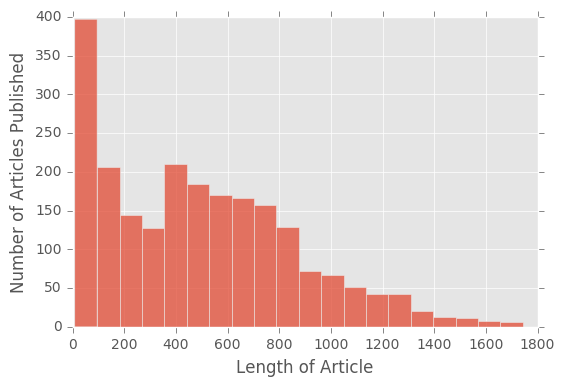

In [37]:
cutoff = np.percentile(df['num_words'], 98)

df.loc[df['num_words'] <= cutoff, 'num_words'].hist(bins=20, alpha=0.75)
plt.ylabel('Number of Articles Published')
plt.xlabel('Length of Article');

## Only rows that contain 'Obama' in the Headline

We can also use standard string functions by using the `.str` functionality in `pandas`.  Take a look at [this page](http://pandas.pydata.org/pandas-docs/stable/text.html) for more information.

In [38]:
df.loc[df['headline'].str.contains('Obama'), 'headline'].head()

27     Obama Administration Appeals Judge's Ruling To...
28     Obama Administration Appeals Judge's Ruling To...
56     Only 26 Percent Of Americans Support Full Repe...
125    For The Holidays, The Obamas Open Up The White...
207    A Closer Look At Obama's Counterterrorism Stra...
Name: headline, dtype: object

## Looking at Average Hour Published by Section

Maybe we have a hypothesis that different sections will vary in the time of day that they are publishing.  We could try and get a sense for this like so:

In [39]:
# Let's subset to just the 10 most popular sections
top_sections = df['section'].value_counts()[:10].index
df_sub = df.loc[df['section'].isin(top_sections), :]

# We are now grouping by the section and extracting the mean hour that articles were published
df_sub.groupby('section')['hour_published'].mean()

section
All Songs Considered    15.410714
Around the Nation       14.869565
Goats and Soda          16.803030
Here And Now            19.143216
Monkey See              15.547619
Parallels               15.931818
Politics                14.309392
Shots - Health News     17.038835
The Salt                17.013158
The Two-Way             16.265136
Name: hour_published, dtype: float64